In [1]:
#例21.1

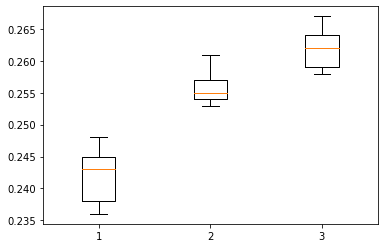

In [2]:
import numpy as np
import matplotlib.pyplot as plt
datas=np.array([[.236,.238,.248,.245,.243],
        [.257,.253,.255,.254,.261],
        [.258,.264,.259,.267,.262]])
levels=list('123')
plt.boxplot(list(datas),labels=levels)
plt.show()

In [3]:
from scipy.stats import f
meanX=datas.mean() #数据的总平均值
ST=np.sum((datas-meanX)**2) #总变差
meanXj=np.mean(datas,axis=1) #不同水平下的样本均值
nj=len(datas[0]) #各水平下的试验次数（均为5）
n=len(datas)*len(datas[0]) #总的试验次数
s=len(datas) #水平个数
SA=sum(nj*meanXj**2)-n*meanX**2 #效应平方和
SE=ST-SA #误差平方和
print('SA:{},\nSE:{},\ns-1:{},\nn-s:{}.\n'.format(SA,SE,s-1,n-s))
f_alpha=f(s-1,n-s).isf(0.05) #拒绝域临界点
testVal=SA/(s-1)/(SE/(n-s)) #检验统计量的观察值
print('f_alpha={},\ntestValue={}.'.format(f_alpha,testVal))
f_alpha<testVal

SA:0.0010533333333332395,
SE:0.00019200000000009617,
s-1:2,
n-s:12.

f_alpha=3.8852938346523933,
testValue=32.916666666647245.


True

In [4]:
from scipy.stats import f_oneway
data1=[.236,.238,.248,.245,.243]
data2=[.257,.253,.255,.254,.261]
data3=[.258,.264,.259,.267,.262]
f_oneway(data1,data2,data3)

F_onewayResult(statistic=32.91666666666668, pvalue=1.3430546820459112e-05)

In [5]:
#使用statsmodels.stats.anova
datas=np.array([[.236,.238,.248,.245,.243],
        [.257,.253,.255,.254,.261],
        [.258,.264,.259,.267,.262]])

In [6]:
import pandas as pd
df=pd.DataFrame()
levels=list('123')
for i in [0,1,2]:
    df[levels[i]]=datas[i]
df

,1,2,3
0,0.236,0.257,0.258
1,0.238,0.253,0.264
2,0.248,0.255,0.259
3,0.245,0.254,0.267
4,0.243,0.261,0.262


In [7]:
df_melt=df.melt()
df_melt.columns=['Level','Value']
df_melt

,Level,Value
0,1,0.236
1,1,0.238
2,1,0.248
3,1,0.245
4,1,0.243
5,2,0.257
6,2,0.253
7,2,0.255
8,2,0.254
9,2,0.261


In [8]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model=ols('Value~Level',data=df_melt).fit()
anova_result=anova_lm(model)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
Level,2.0,0.001053,0.000527,32.916667,0.000013
Residual,12.0,0.000192,0.000016,NaN,NaN


In [9]:
#PR(>F)=0.000013<0.05,说明应该拒绝各水平的均值相等的假设

In [10]:
#例21.2

In [11]:
from scipy.stats import t
sigma2_estimate=SE/(n-s)
print('sigma2_estimate is {:.6f}.'.format(sigma2_estimate))
mus=np.mean(datas,axis=1) #不同水平的样本均值
print('estimate mu1={:.3f},estimate mu2={:.3f}\
       estimate mu3={:.3f}.'.format(mus[0],mus[1],mus[2]))
print('estimate deltas is {}.'.format(np.mean(datas,axis=1)-np.mean(datas)))
#均值差的置信区间
sub_mu=[mus[0]-mus[1],mus[0]-mus[2],mus[1]-mus[2]]
ME=t(n-s).isf(0.05/2)*np.sqrt(SE/(n-s)*2/5)
np.round([(sub_mu[i]-ME,sub_mu[i]+ME) for i in [0,1,2]],3)

sigma2_estimate is 0.000016.
estimate mu1=0.242,estimate mu2=0.256       estimate mu3=0.262.
estimate deltas is [-0.01133333  0.00266667  0.00866667].


array([[-0.02 , -0.008],
       [-0.026, -0.014],
       [-0.012, -0.   ]])

In [12]:
#例21.3

In [13]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df=pd.DataFrame()
df['1']=[19,22,20,18,15]
df['2']=[20,21,33,27,40]
df['3']=[16,15,18,26,17]
df['4']=[18,22,19,None,None]
df_melt=df.melt()
df_melt.columns=['Type','Value']
model=ols('Value~Type',data=df_melt).fit()
anova_res=anova_lm(model)
anova_res

,df,sum_sq,mean_sq,F,PR(>F)
Type,3.0,318.977778,106.325926,3.764067,0.035866
Residual,14.0,395.466667,28.247619,NaN,NaN


In [14]:
#0.035866<0.05,所以认为水平间的均值是有差异的